# Problem 1
### Air Pressure System Failure in Scania Trucks

In [1]:
import pandas as pd
import numpy as np
import os

# reading testing and training
root_path = os.path.join(os.getcwd(),"DataSet") # root path 
path_test = os.path.join(root_path,"aps_failure_test_set.csv") # path of the testing set
path_training = os.path.join(root_path,"aps_failure_training_set.csv") # path of the training set

#Reading data sets
print(root_path)
df_test = pd.read_csv(path_test)
df_training = pd.read_csv(path_training)
df_test

/Users/francisco/Desktop/Org_Desktop/Fall_2018/Data_Mining/HW/HW1/ipython/DataSet


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
5,neg,174,na,26,24,0,0,na,na,na,...,na,na,na,na,na,na,na,na,0,0
6,neg,40202,na,640,606,0,0,0,0,0,...,526218,239734,439556,374248,169096,53658,41054,320,0,0
7,neg,120278,na,2130706432,256,0,0,0,0,0,...,1006722,459658,876356,689532,568540,500624,1006628,34820,0,0
8,neg,14592,0,2130706438,162,0,0,0,0,0,...,105024,57398,49152,38256,243268,145144,0,0,0,0
9,neg,28338,na,2130706432,238,0,0,0,0,0,...,357006,150056,264776,239282,140548,74750,32958,84,0,0


## Visualizing distribution of missing values

In [2]:
import missingno as msno #library used to visualize missing values. (reusing code)
df_test_replaced_nan = df_test.replace(to_replace='na',value=np.nan) # replacing 'na' with NaN (easier read)
df_training_replaced_nan = df_training.replace(to_replace='na',value=np.nan)

print("Test Data Set Missing Values")
print(df_test_replaced_nan.info())
msno.matrix(df_test_replaced_nan)

Test Data Set Missing Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB
None


Training Data Set Missing Values
             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06


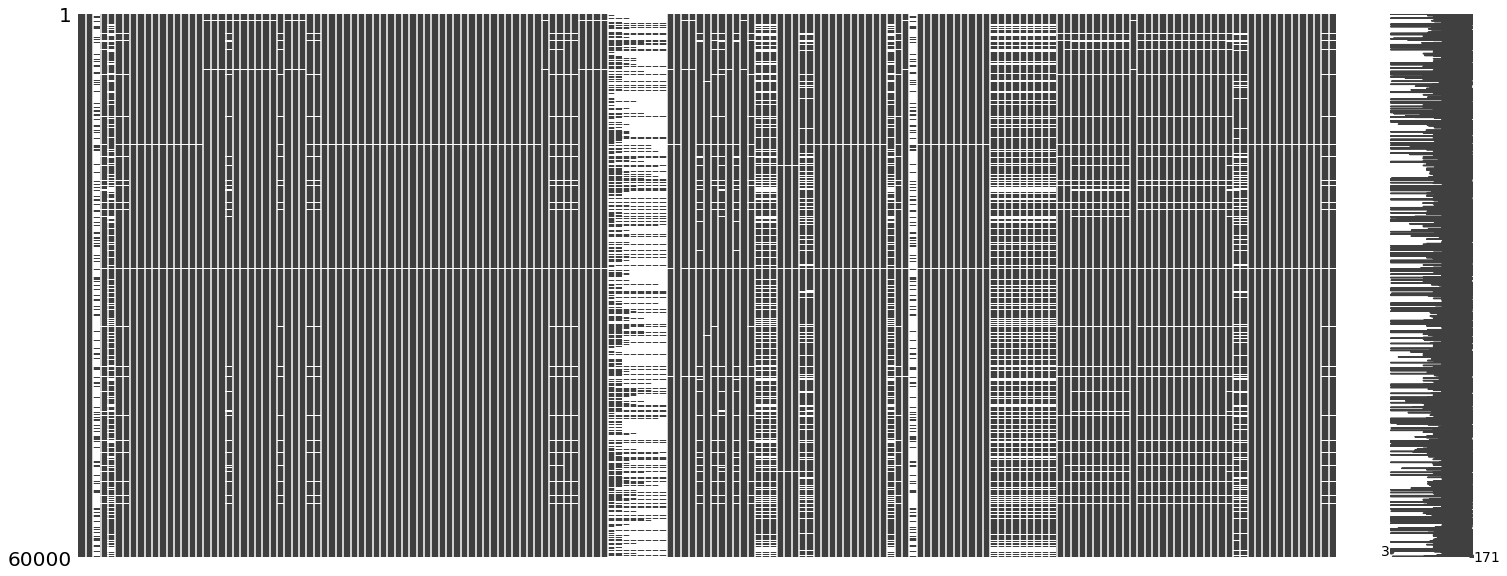

In [3]:
print("Training Data Set Missing Values")
print(df_training_replaced_nan.describe())
msno.matrix(df_training_replaced_nan)

## Missing value total

In [4]:

# function for counting number of na
#parameters: DataFrame
def count_na(df):
    total = 0
    for col in df:
        # If you wish to see all of the missing values for every column then uncomment the print statements
        #print("---------------")
        #print("Column "+col+" na total: ")
        #print(df[col].isnull().sum())
        total+=df[col].isnull().sum()
        #print("---------------")
        #print("\n")
    return total
test_total_missing_values = count_na(df_test_replaced_nan)
training_total_missing_values = count_na(df_training_replaced_nan)
print("The total number of missing values for the testing set is: %d" %test_total_missing_values)
print("The total number of missing values for the training set is: %d" %training_total_missing_values)

The total number of missing values for the testing set is: 228680
The total number of missing values for the training set is: 850015


## Percentages Function

In [5]:
from collections import Counter
# This function gives the percentage of a certain val in a column
#Parameters:
#df --> Data Frame
# col --> column of interest
# val --> value to count occurences
def col_val_percentage(df,col,val=None): # calculate the percentage of missing values for a given column name
    total = len(df[col])
    if(val == None): # Missing values
        num_val = df[col].isnull().sum()
    else: # Other values
        num_val = Counter(df[col])[val]
    return (num_val/total)

## Eliminate columns given percentages

In [6]:
def drop_col(df,na_percent =0.25,zero_percent=0.5):
    drop_ls = [] # list of columns to drop
    for col in df:
        # getting percentages for every column
        (col_na_percent,col_zero_percent) = (col_val_percentage(df,col),col_val_percentage(df,col,'0'))
        
        if(col_na_percent > na_percent and col_zero_percent > zero_percent):
            drop_ls.append(col)
        print((col_na_percent,col_zero_percent,col_na_percent > na_percent and col_zero_percent > zero_percent))
    
    return(df.drop(drop_ls))
            

In [7]:
for col in df_test_replaced_nan:
    print(col_val_percentage(df_test_replaced_nan,col),col_val_percentage(df_test_replaced_nan,col,'0'))

0.0 0.0
0.0 0.0
0.7726875 0.1790625
0.057875 0.1430625
0.2488125 0.0324375
0.043125 0.92275
0.043125 0.9213125
0.0118125 0.9843125
0.0118125 0.9734375
0.0118125 0.934625
0.0118125 0.777625
0.0118125 0.02125
0.0118125 0.0311875
0.0118125 0.020375
0.0118125 0.2586875
0.0118125 0.41775
0.0118125 0.6748125
0.0109375 0.001875
0.0101875 0.8875
0.0101875 0.77975
0.074875 0.918625
0.0105625 0.6196875
0.0101875 0.6160625
0.0105625 0.002
0.010125 0.0020625
0.0105625 0.00175
0.010125 0.0028125
0.04775 0.9110625
0.0101875 0.98925
0.0101875 0.8855
0.0101875 0.9886875
0.043 0.166
0.043 0.17
0.012 0.9779375
0.012 0.968875
0.012 0.9686875
0.012 0.96775
0.012 0.9515625
0.012 0.5024375
0.012 0.2761875
0.012 0.12425
0.012 0.0784375
0.012 0.9776875
0.012 0.018375
0.012 0.0259375
0.012 0.022
0.012 0.0198125
0.012 0.0193125
0.012 0.0189375
0.012 0.139625
0.012 0.7503125
0.012 0.9031875
0.012 0.9575625
0.0120625 0.018375
0.0120625 0.01925
0.0120625 0.01975
0.0120625 0.0199375
0.0120625 0.020375
0.0120625 0.0

## Percentile

In [8]:
def drop_percentile(df,percentile):
    for col in df:
        if(col!='class'):
            l = df[col]
            l =np.array(l.dropna()).astype(np.float)
            print(np.quantile(l,percentile))
            
    
"""def drop_df_percentile(df, percentile):
    drop_ls = [] # list of columns to drop
    for col in df:
        percentile="""


'def drop_df_percentile(df, percentile):\n    drop_ls = [] # list of columns to drop\n    for col in df:\n        percentile='

In [9]:
#x = np.array(df_test_replaced_nan['ab_000'].dropna())
#np.quantile(x.astype(np.float),0.99)
drop_percentile(df_test_replaced_nan,0.99)
np.mean(np.array(df_test_replaced_nan['ab_000'].dropna()).astype(np.float))
#df_test_replaced_nan[]

918064.1000000001
10.0
2130706448.0
4349.279999999999
123.63999999999942
200.73999999999796
0.0
2455.999999999971
167881.59999999957
2874212.199999997
12060137.599999972
17823549.199999984
20340384.599999964
5397532.599999992
416448.599999999
31896.199999999993
26311252.0
144273.4399999996
1076.1599999999744
0.0
1591293.0000000007
2656513.119999977
47980518.60000018
41612109.95999977
17768262.80000001
7229075.3599999985
12.0
0.0
59924.639999999956
0.0
17419.819999999978
5241.119999999995
2.0
11614.44000000009
9212.58000000003
15192.500000000015
20123.300000000003
989568.4600000018
12298430.900000203
24668472.180000037
21659386.86000001
4.0
114666.38000000005
71910.74
129373.16000000012
973407.2200000022
21527768.52000008
35784356.42000006
2715783.0200000033
344806.2000000006
4376.200000000041
20.0
21018197.760000013
12895837.760000026
6385506.640000001
4276149.680000004
3072995.680000023
2688453.6400000188
2972864.3600000106
2326688.680000006
759685.6400000018
1004274.9200000095
683649

0.7720648886444872

## Imputation

In [10]:
from sklearn.neighbors import NearestNeighbors # Nearest neighbor implementation
#imputation using mean
def impute_mean(df):
    for col in df:
        if(col!='class'): # if not the class column
            df_prime=df[col].dropna() # drop columns
            df_prime = np.array(df_prime).astype(np.float)
            mean = np.mean(df_prime)
            df[col].replace(to_replace=np.nan,value=mean)
    return df
            
#imputation using median  
def impute_median(df):
    for col in df:
        if(col!='class'): # if not the class column
            df_prime=df[col].dropna() # drop columns
            df_prime = np.array(df_prime).astype(np.float)
            median = np.median(df_prime)
            df[col].replace(to_replace=np.nan,value=median)
    return df

#imputation using knn
def impute_knn(df,k):
    #for rows in df.iter
    pass

In [20]:
import math
from sklearn.neighbors import NearestNeighbors
# Obtains a list of rows that contain nan object and those that don't 
def separate_row(df):
    ls_nan_vec = []
    ls_vec = []
    m = df.replace(np.nan,-10.0).values # obtain matrix of data and substituting nan witha -10 for easier reading
    for row in m:
        #check if it has a -10
        if(np.isin(-10.0,row)):
            ls_nan_vec.append(row)
        else:
            ls_vec.append(row)
            
    return(np.array(ls_nan_vec),np.array(ls_vec))


#Returns the indices of the occurences of a certain key in a vector
def index_key(vec,key):
    index_ls = []
    for i, j in enumerate(vec):
        if j == key:
            index_ls.append(i)
    return index_ls
#Given a matrix      
def get_values(vec, index_ls):
    values = []
    for i in index_ls:
        values.append(vec[i])
    return values
        
def predict_NaN(df,k,knn_matrix, vec_to_predict):
    neigh = NearestNeighbors(n_neighbors=k)
    m = [] # matrix of dropped NaN values
    pred_matrix_for_NaN = [] # list of the predicted values for NaN
    #returns the location of all the NaN entries in the vector to predict
    nan_position_ls = index_key(vec_to_predict,-10.0)
    new_vec_to_pred = np.delete(vec_to_predict,nan_position_ls) # removing NaN
    
    
    for row in knn_matrix:
        m.append(np.delete(row,nan_position_ls)) # removing component that also contain NaN in the matrix
    
    # fitting the Classifier
    neigh.fit(m)
    # Obtain the distances and indices of the k closest vectors to new_vec_to_pred
    (dist,vec_index)=neigh.kneighbors(np.array([new_vec_to_pred]))
    
    for i in vec_index[0]:# for every vector
        val_ls = get_values(knn_matrix[i],nan_position_ls)
        pred_matrix_for_NaN.append(val_ls)
    



"""l=[]
for i in range(df_test_replaced_nan.shape[0]):
    l.append(m[i][1:])
    
l[0]"""
m = df_test_replaced_nan.replace(np.nan,-10).values
print(type(m))
y = m[3:10,1:5].astype(np.float)
print(y)


np.isin(-10.0,y[4])
l = []
print(y[0])
for row in y:
    #f = np.delete(row,[0,2])
    print(np.array([row]))
    #l.append(f)
    
    
#print(np.array(l[0]))

<class 'numpy.ndarray'>
[[ 5.98160000e+04 -1.00000000e+01  1.01000000e+03  9.36000000e+02]
 [ 1.81400000e+03 -1.00000000e+01  1.56000000e+02  1.40000000e+02]
 [ 1.74000000e+02 -1.00000000e+01  2.60000000e+01  2.40000000e+01]
 [ 4.02020000e+04 -1.00000000e+01  6.40000000e+02  6.06000000e+02]
 [ 1.20278000e+05 -1.00000000e+01  2.13070643e+09  2.56000000e+02]
 [ 1.45920000e+04  0.00000000e+00  2.13070644e+09  1.62000000e+02]
 [ 2.83380000e+04 -1.00000000e+01  2.13070643e+09  2.38000000e+02]]
[ 5.9816e+04 -1.0000e+01  1.0100e+03  9.3600e+02]
[[ 5.9816e+04 -1.0000e+01  1.0100e+03  9.3600e+02]]
[[1814.  -10.  156.  140.]]
[[174. -10.  26.  24.]]
[[ 4.0202e+04 -1.0000e+01  6.4000e+02  6.0600e+02]]
[[ 1.20278000e+05 -1.00000000e+01  2.13070643e+09  2.56000000e+02]]
[[1.45920000e+04 0.00000000e+00 2.13070644e+09 1.62000000e+02]]
[[ 2.83380000e+04 -1.00000000e+01  2.13070643e+09  2.38000000e+02]]


In [16]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5],[5.,6.0,7.0],[4.,3.,2.]]
n = NearestNeighbors(n_neighbors=3)
n.fit(samples)
n.kneighbors([[1.0,1.0,1.0]])

(array([[0.5       , 1.5       , 1.73205081]]), array([[2, 1, 0]]))